# Final Project (Decision Tree)

Import common neccesry libraries.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from show_hands import show_hands

Read Poker Hand Data as pandas dataframe.

In [4]:
current_directory = os.getcwd()
data_directory = os.path.join(current_directory, 'Poker data')
train_data_file = os.path.join(data_directory, 'poker-hand-training-true.csv')
train_data = pd.read_csv(train_data_file)

test_data_file = os.path.join(data_directory, 'poker-hand-testing.csv')
test_data = pd.read_csv(test_data_file)

## Description of data


- Output

0: Nothing in hand; not a recognized poker hand

1: One pair; one pair of equal ranks within five cards

2: Two pairs; two pairs of equal ranks within five cards

3: Three of a kind; three equal ranks within five cards

4: Straight; five cards, sequentially ranked with no gaps

5: Flush; five cards with the same suit

6: Full house; pair + different rank three of a kind

7: Four of a kind; four equal ranks within five cards

8: Straight flush; straight + flush

9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush



In [5]:
train_data = train_data.head(8000)

In [6]:
train_dummy_data = pd.get_dummies(train_data, columns=train_data.columns[0:10:2])
train_dummy_data 

,C1,C2,C3,C4,C5,Class,S1_1,S1_2,S1_3,S1_4,...,S3_3,S3_4,S4_1,S4_2,S4_3,S4_4,S5_1,S5_2,S5_3,S5_4
0,10,11,13,12,1,9,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,11,13,10,12,1,9,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,12,11,13,10,1,9,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,10,11,1,13,12,9,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1,13,12,11,10,9,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10,4,8,10,13,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
7996,13,1,2,3,4,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
7997,1,6,4,6,6,3,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
7998,6,12,10,4,10,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [8]:
test_data = test_data.head(2000)

In [9]:
test_dummy_data = pd.get_dummies(test_data, columns=test_data.columns[0:10:2])
test_dummy_data 

,C1,C2,C3,C4,C5,Class,S1_1,S1_2,S1_3,S1_4,...,S3_3,S3_4,S4_1,S4_2,S4_3,S4_4,S5_1,S5_2,S5_3,S5_4
0,1,13,4,3,12,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,12,2,11,5,5,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,9,6,4,2,9,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,13,13,1,6,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,10,7,2,11,9,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,12,11,12,12,7,3,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1996,11,9,7,13,8,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1997,3,6,9,12,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1998,1,5,3,5,2,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [10]:
labels = list(train_dummy_data.columns)
labels.pop(5)
print(labels)

['C1', 'C2', 'C3', 'C4', 'C5', 'S1_1', 'S1_2', 'S1_3', 'S1_4', 'S2_1', 'S2_2', 'S2_3', 'S2_4', 'S3_1', 'S3_2', 'S3_3', 'S3_4', 'S4_1', 'S4_2', 'S4_3', 'S4_4', 'S5_1', 'S5_2', 'S5_3', 'S5_4']


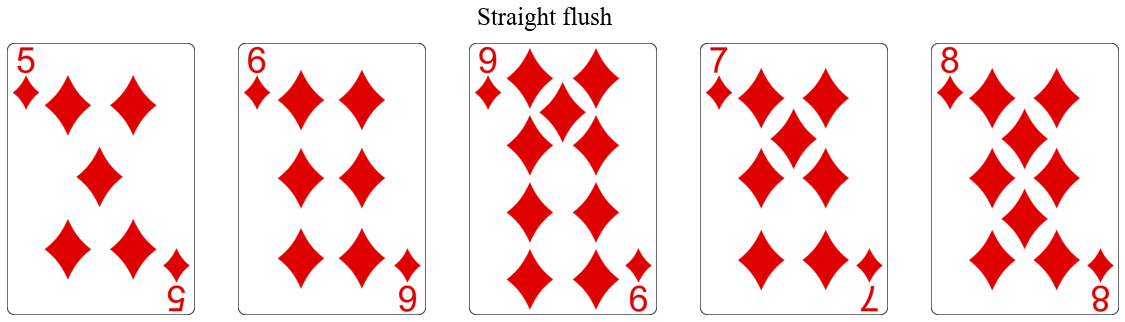

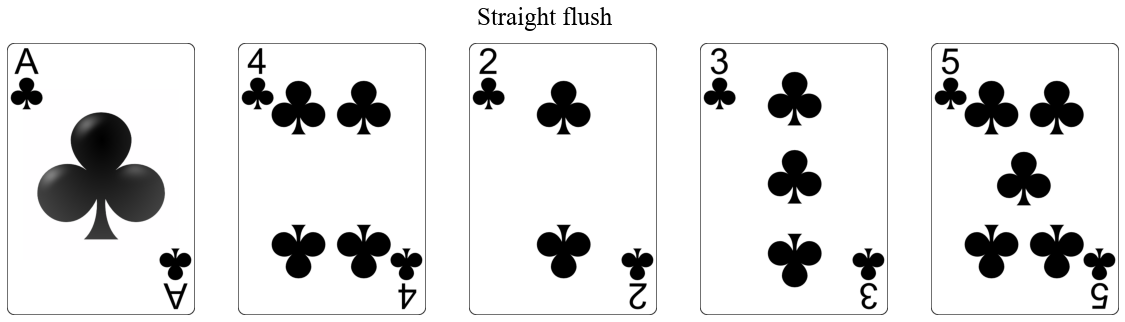

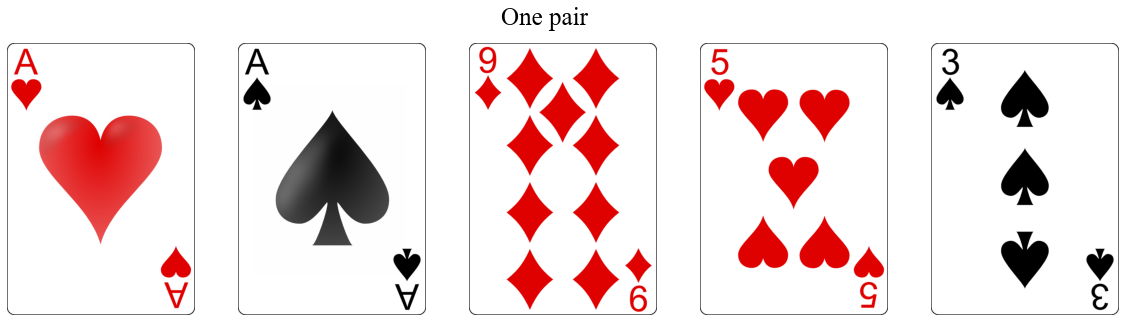

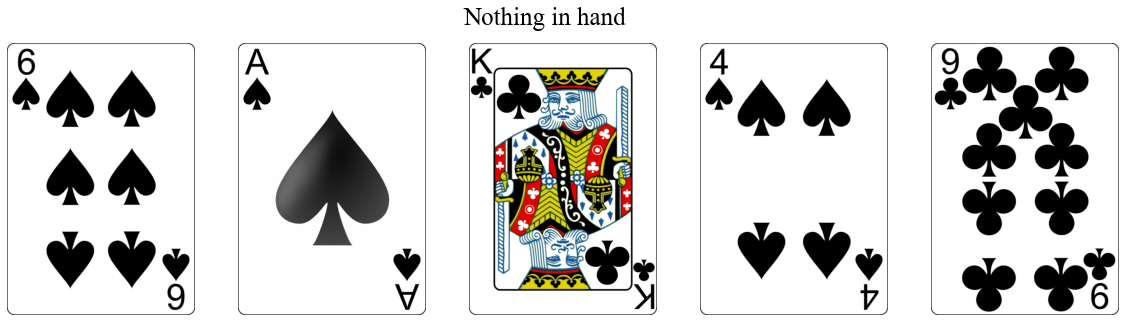

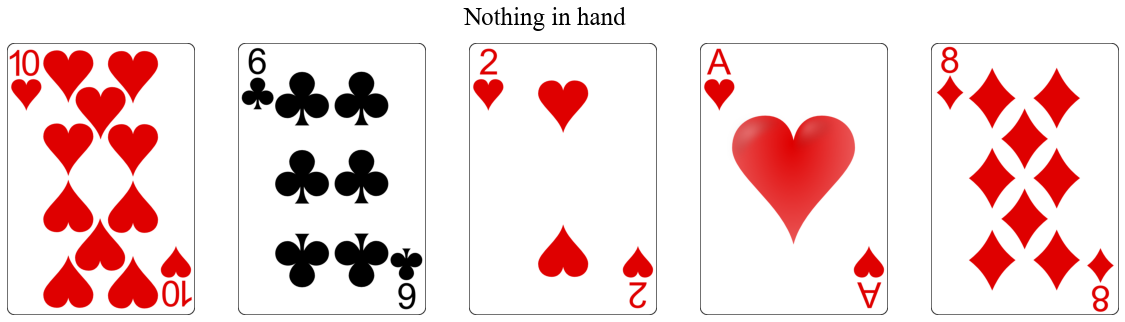

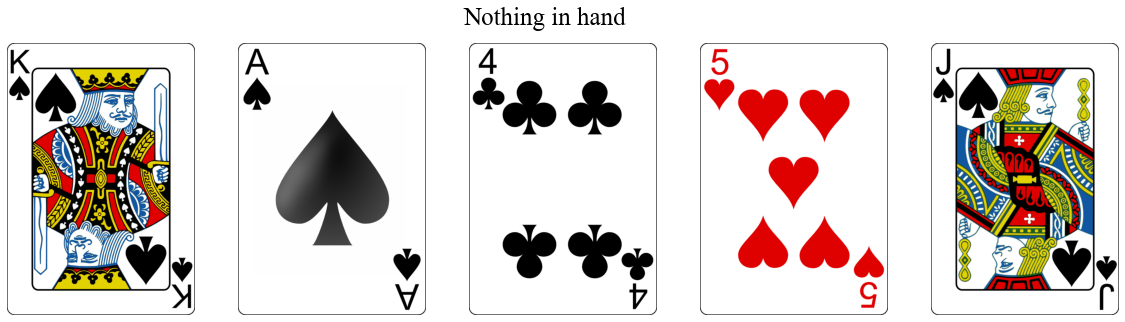

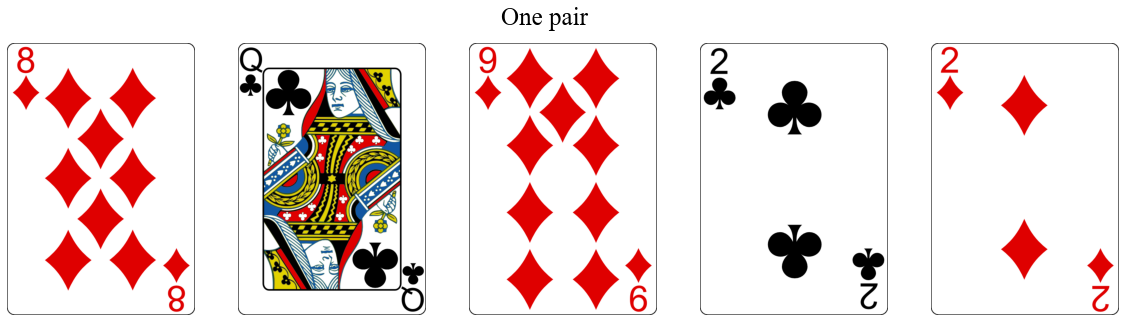

In [11]:
for i in range(8, 15):
    tmp = train_data.iloc[i].to_numpy() 
    show_hands(tmp[:-1], tmp[-1])

## 1. Decision Tree classification

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

acc_trains = []
acc_tests = []

maxdepth = np.arange(1,100,1)

for i in maxdepth:
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(train_dummy_data[labels], train_dummy_data['Class'])
    y_pred_train = clf.predict(train_dummy_data[labels])
    y_pred_test = clf.predict(test_dummy_data[labels])
    acc_train = accuracy_score(y_pred_train, train_dummy_data['Class'])
    acc_test = accuracy_score(y_pred_test, test_dummy_data['Class'])
    acc_trains.append(acc_train)
    acc_tests.append(acc_test)


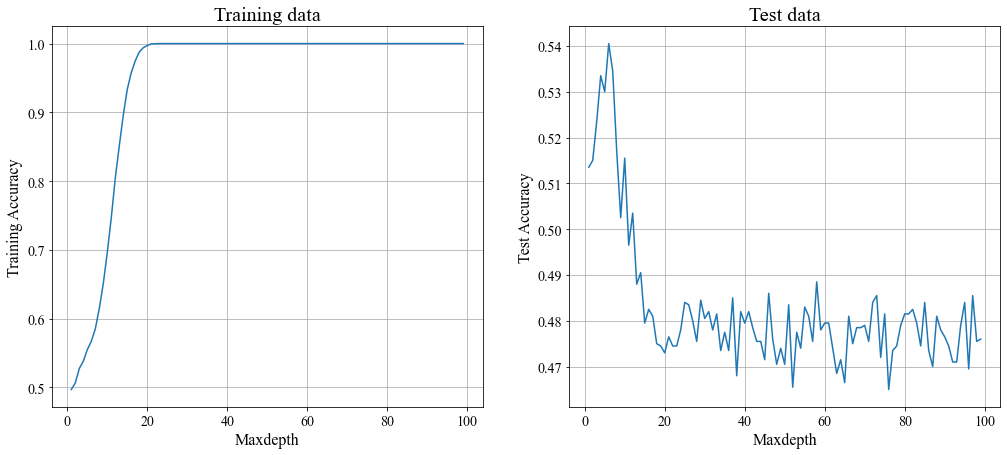

In [15]:
fig = plt.figure(figsize=(17, 7))

rows = 1
columns = 2
fs = 16

fig.add_subplot(rows, columns, 1)
plt.plot(maxdepth, acc_trains)
plt.xlabel('Maxdepth', fontsize=fs)
plt.ylabel('Training Accuracy', fontsize=fs)
plt.title('Training data', fontsize=fs+4)
plt.xticks(fontsize=fs-2)
plt.yticks(fontsize=fs-2)
plt.grid()

fig.add_subplot(rows, columns, 2)
plt.plot(maxdepth, acc_tests)
plt.xlabel('Maxdepth', fontsize=fs)
plt.ylabel('Test Accuracy', fontsize=fs)
plt.title('Test data', fontsize=fs+4)
plt.xticks(fontsize=fs-2)
plt.yticks(fontsize=fs-2)
plt.grid()

plt.show()

In [25]:
maxdepth

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [26]:
acc_tests

[0.5135,
 0.515,
 0.5235,
 0.5335,
 0.53,
 0.5405,
 0.5345,
 0.517,
 0.5025,
 0.5155,
 0.4965,
 0.5035,
 0.488,
 0.4905,
 0.4795,
 0.4825,
 0.481,
 0.475,
 0.4745,
 0.473,
 0.4765,
 0.4745,
 0.4745,
 0.478,
 0.484,
 0.4835,
 0.48,
 0.4755,
 0.4845,
 0.4805,
 0.482,
 0.478,
 0.4815,
 0.4735,
 0.4775,
 0.4735,
 0.485,
 0.468,
 0.482,
 0.4795,
 0.482,
 0.4785,
 0.4755,
 0.4755,
 0.4715,
 0.486,
 0.476,
 0.4705,
 0.474,
 0.4705,
 0.4835,
 0.4655,
 0.4775,
 0.474,
 0.483,
 0.481,
 0.4755,
 0.4885,
 0.478,
 0.4795,
 0.4795,
 0.474,
 0.4685,
 0.4715,
 0.4665,
 0.481,
 0.475,
 0.4785,
 0.4785,
 0.479,
 0.4755,
 0.484,
 0.4855,
 0.472,
 0.4815,
 0.465,
 0.4735,
 0.4745,
 0.479,
 0.4815,
 0.4815,
 0.4825,
 0.4795,
 0.4745,
 0.484,
 0.4735,
 0.47,
 0.481,
 0.478,
 0.4765,
 0.4745,
 0.471,
 0.471,
 0.479,
 0.484,
 0.4695,
 0.4855,
 0.4755,
 0.476]

In [18]:
importances = clf.feature_importances_


In [19]:
features = clf.feature_names_in_

In [24]:
clf.tree_

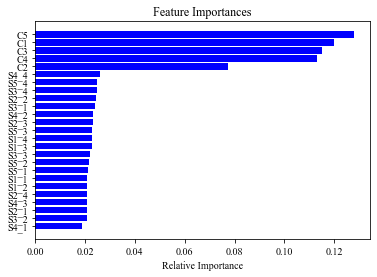

In [20]:

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()